In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("2018.csv")

In [13]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [20]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


## descartamos la columna Overall rank ya que es un ranqueo en secuencia de menor a mayor y no es necesario hacer un analisis numerico continuo 

In [22]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [43]:
select_column = ['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']

In [44]:
corr_use = df.loc[ :, select_column ].corr()

In [45]:
corr_use

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.405292
GDP per capita,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.319582
Social support,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.218364
Healthy life expectancy,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.315569
Freedom to make life choices,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.462446
Generosity,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.362249
Perceptions of corruption,0.405292,0.319582,0.218364,0.315569,0.462446,0.362249,1.000000


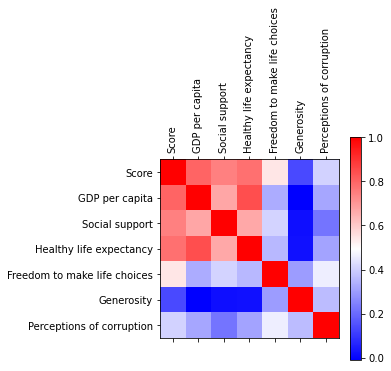

In [60]:
plt.matshow(corr_use, cmap="bwr")
plt.xticks(range(7), corr_use.columns, rotation=90 )
plt.yticks(range(7), corr_use.columns )
plt.colorbar()

## Al analizar vemos que hay una extrema correlacion entre la misma vaiable tanto en magnitud como en la direcicion de la relacion y es de 1 a 1 por lo tanto la podriamos descartar para un analisis, por otro lado se observa que entre la esperanza de vida, el apoyo social y los GDP hay una correlaion bastante cercana.

## Si hacemos el estudio entre la poblacion que es generosa y la columna de GDP per capita no concluiriamos en nada ya que entre estas dos hay una correlacion negativa muy cercana a 0, es muy neutral.

## Observamos que la esperanza de vida gracias al GDP per capita es muy buena hay buena correlacion ya que se aproxima mucho a 1

## Vemos que en el aspecto de generosidad para un apoyo social y esperanza de vida se da una multicolinealidad no nos aportan mucha iformacion de estudio estan muy cercanas a 0, casi no hay relacion entre ellas. 

## Por ultimo cuanto más lejos esté el coeficiente de correlación de cero, más fuerte será la relación entre las variables de estudio.

## Ejemplos de causalidad

## 1. Si no tengo servicio de acceso a internet no puedo navegar por la web.
## 2. Apagar los electrodomésticos y lámparas que no se usan tiene como efecto un ahorro de energía.
## 3. Organizar las tareas a cumplir tiene como efecto una mayor eficiencia.